In [1]:
import os

os.getcwd()

'/Users/nicholaschoong/Documents/QuantumTransformer/test'

In [2]:
import sys

sys.path.append("/Users/nicholaschoong/Documents/QuantumTransformer")

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.nn.functional as F

In [4]:
def seed_everything(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)  # if you are using multi-GPU.
    np.random.seed(seed)  # Numpy module.
    random.seed(seed)  # Python random module.
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True
    torch.use_deterministic_algorithms(True)


seed_everything(42)

In [5]:
# dev = (
#     torch.device("mps")
#     if torch.backends.mps.is_available()
#     else torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
# )

dev = torch.device("cpu")
dev

device(type='cpu')

In [6]:
from classic.attention import attention

query = torch.rand(32, 128, device=dev)
key = torch.rand(32, 128, device=dev)
value = torch.rand(32, 128, device=dev)

In [7]:
py_att_output = F.scaled_dot_product_attention(query, key, value)
my_att_output = attention(query, key, value)

print(py_att_output.size())
print(my_att_output[0].size())

torch.Size([32, 128])
torch.Size([32, 128])


In [8]:
print(torch.allclose(py_att_output, my_att_output[0], rtol=1e-6))
print(
    torch.sum(torch.eq(py_att_output, my_att_output[0])).item()
    / py_att_output.nelement()
)
print(f"Maximum difference: {torch.abs(py_att_output - my_att_output[0]).max()}")

True
0.218994140625
Maximum difference: 2.384185791015625e-07


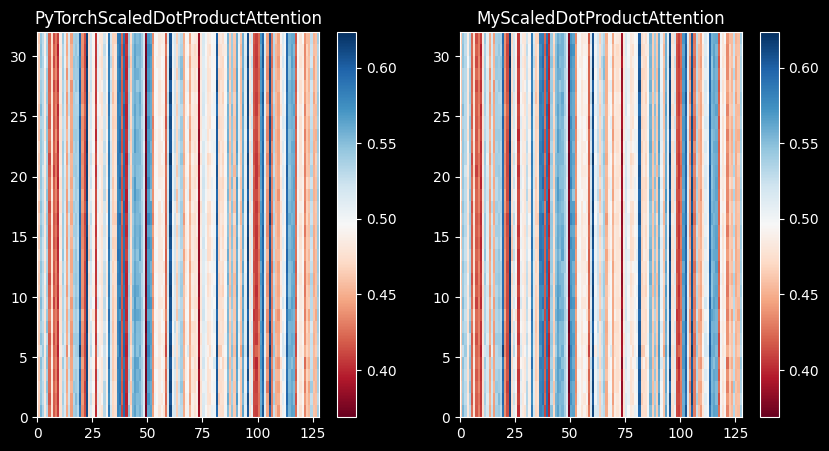

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pcolormesh(py_att_output.cpu().detach().numpy(), cmap="RdBu")
plt.title("PyTorchScaledDotProductAttention")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(my_att_output[0].cpu().detach().numpy(), cmap="RdBu")
plt.title("MyScaledDotProductAttention")
plt.colorbar()
plt.show()

In [10]:
from classic.positional_encoding import PositionalEncoder, PyTorchPositionalEncoding

input_tensor = torch.randn(2, 10, 512)

In [11]:
pos_enc1 = PositionalEncoder(embed_dim=512, max_seq_len=512)
pos_enc2 = PyTorchPositionalEncoding(d_model=512, max_len=512)

pos_output1 = pos_enc1(input_tensor)
pos_output2 = pos_enc2(input_tensor)

print(pos_output1.size())
print(pos_output2.size())

torch.Size([2, 10, 512])
torch.Size([2, 10, 512])


In [12]:
print(torch.allclose(pos_output1, pos_output2, atol=1e-3))
print(torch.sum(torch.eq(pos_output1, pos_output2)).item() / pos_output1.nelement())
print(f"Maximum difference: {torch.abs(pos_output1 - pos_output2).max()}")

False
0.0
Maximum difference: 98.77032470703125


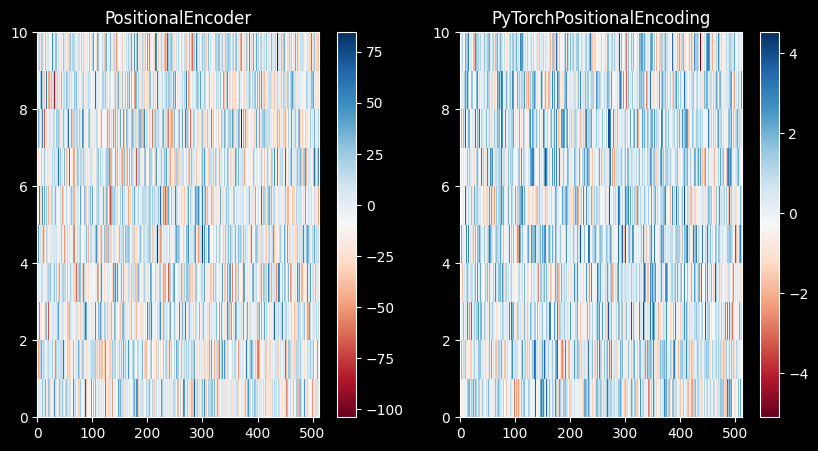

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pcolormesh(pos_output1[0].detach().numpy(), cmap="RdBu")
plt.title("PositionalEncoder")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(pos_output2[0].detach().numpy(), cmap="RdBu")
plt.title("PyTorchPositionalEncoding")
plt.colorbar()
plt.show()

In [14]:
# x = [[1, 0, 1, 0], [0, 2, 0, 2], [1, 1, 1, 1]]  # Seq 1  # Seq 2  # Seq 3
# x = torch.tensor(x, dtype=torch.float32)

# w_key = [[0, 0, 1, 1], [1, 1, 0, 1], [0, 1, 0, 1], [1, 1, 0, 1]]
# w_query = [[1, 0, 1, 1], [1, 0, 0, 1], [0, 0, 1, 1], [0, 1, 1, 1]]
# w_value = [[0, 2, 0, 1], [0, 3, 0, 1], [1, 0, 3, 1], [1, 1, 0, 1]]
# w_key = torch.tensor(w_key, dtype=torch.float32)
# w_query = torch.tensor(w_query, dtype=torch.float32)
# w_value = torch.tensor(w_value, dtype=torch.float32)


# keys = (x @ w_key).unsqueeze(0)  # to batch mode
# querys = (x @ w_query).unsqueeze(0)
# values = (x @ w_value).unsqueeze(0)

x = torch.rand(32, 128, 64, device=dev)

In [15]:
from classic.multihead import MultiHeadedAttention

embed_dim = 64
num_heads = 1

multihead_attn1 = MultiHeadedAttention(embed_dim, num_heads)

multihead_attn_output1 = multihead_attn1(x, x, x)


multihead_attn2 = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
multihead_attn_output2, multihead_attn_output_weights2 = multihead_attn2(x, x, x)

print(multihead_attn_output1.size())
print(multihead_attn_output2.size())

torch.Size([32, 128, 64])
torch.Size([32, 128, 64])


In [16]:
multihead_attn_output1

tensor([[[-0.0382, -0.1006, -0.2196,  ...,  0.2269,  0.1308, -0.0753],
         [-0.0373, -0.0903, -0.2244,  ...,  0.2313,  0.1281, -0.0829],
         [-0.0360, -0.0913, -0.2173,  ...,  0.2308,  0.1264, -0.0755],
         ...,
         [-0.0391, -0.0930, -0.2204,  ...,  0.2266,  0.1250, -0.0791],
         [-0.0351, -0.0929, -0.2198,  ...,  0.2295,  0.1255, -0.0807],
         [-0.0328, -0.0900, -0.2079,  ...,  0.2131,  0.1254, -0.0710]],

        [[-0.0301, -0.1115, -0.2178,  ...,  0.2380,  0.1460, -0.0888],
         [-0.0308, -0.1111, -0.2253,  ...,  0.2378,  0.1438, -0.0852],
         [-0.0294, -0.1048, -0.2115,  ...,  0.2240,  0.1439, -0.0808],
         ...,
         [-0.0284, -0.1085, -0.2278,  ...,  0.2391,  0.1475, -0.0881],
         [-0.0316, -0.1110, -0.2289,  ...,  0.2381,  0.1494, -0.0872],
         [-0.0427, -0.1044, -0.2186,  ...,  0.2322,  0.1455, -0.0864]],

        [[-0.0484, -0.0982, -0.2089,  ...,  0.2362,  0.1235, -0.0870],
         [-0.0490, -0.1007, -0.2130,  ...,  0

In [17]:
multihead_attn_output2

tensor([[[-0.0948, -0.0701,  0.1585,  ...,  0.1436, -0.1387,  0.1637],
         [-0.0946, -0.0712,  0.1584,  ...,  0.1435, -0.1395,  0.1639],
         [-0.0948, -0.0706,  0.1578,  ...,  0.1420, -0.1384,  0.1645],
         ...,
         [-0.0949, -0.0705,  0.1588,  ...,  0.1425, -0.1379,  0.1633],
         [-0.0950, -0.0700,  0.1582,  ...,  0.1430, -0.1382,  0.1640],
         [-0.0940, -0.0696,  0.1574,  ...,  0.1443, -0.1384,  0.1635]],

        [[-0.1053, -0.0646,  0.1387,  ...,  0.1338, -0.1530,  0.1593],
         [-0.1047, -0.0653,  0.1385,  ...,  0.1332, -0.1520,  0.1586],
         [-0.1058, -0.0652,  0.1380,  ...,  0.1357, -0.1526,  0.1582],
         ...,
         [-0.1055, -0.0650,  0.1386,  ...,  0.1346, -0.1530,  0.1578],
         [-0.1057, -0.0651,  0.1383,  ...,  0.1345, -0.1515,  0.1582],
         [-0.1065, -0.0654,  0.1392,  ...,  0.1354, -0.1532,  0.1598]],

        [[-0.1245, -0.0708,  0.1442,  ...,  0.1247, -0.1484,  0.1659],
         [-0.1257, -0.0708,  0.1436,  ...,  0

In [35]:
print(
    torch.allclose(multihead_attn_output1, multihead_attn_output2, rtol=1e0, atol=1e0)
)
print(
    torch.sum(torch.eq(multihead_attn_output1, multihead_attn_output2)).item()
    / multihead_attn_output1.nelement()
)
print(
    f"Maximum difference: {torch.abs(multihead_attn_output1 - multihead_attn_output2).max()}"
)

True
0.0
Maximum difference: 0.7972005605697632


In [27]:
multihead_attn_output1 - multihead_attn_output2

tensor([[[ 0.0566, -0.0305, -0.3781,  ...,  0.0833,  0.2695, -0.2390],
         [ 0.0573, -0.0192, -0.3828,  ...,  0.0878,  0.2676, -0.2468],
         [ 0.0587, -0.0207, -0.3750,  ...,  0.0888,  0.2647, -0.2400],
         ...,
         [ 0.0558, -0.0225, -0.3791,  ...,  0.0841,  0.2630, -0.2423],
         [ 0.0599, -0.0229, -0.3780,  ...,  0.0865,  0.2637, -0.2447],
         [ 0.0612, -0.0204, -0.3653,  ...,  0.0689,  0.2638, -0.2345]],

        [[ 0.0752, -0.0470, -0.3565,  ...,  0.1042,  0.2990, -0.2481],
         [ 0.0738, -0.0458, -0.3639,  ...,  0.1046,  0.2959, -0.2438],
         [ 0.0763, -0.0396, -0.3496,  ...,  0.0883,  0.2966, -0.2390],
         ...,
         [ 0.0771, -0.0435, -0.3664,  ...,  0.1044,  0.3004, -0.2460],
         [ 0.0741, -0.0460, -0.3673,  ...,  0.1036,  0.3009, -0.2454],
         [ 0.0638, -0.0390, -0.3579,  ...,  0.0968,  0.2987, -0.2462]],

        [[ 0.0762, -0.0274, -0.3531,  ...,  0.1115,  0.2719, -0.2528],
         [ 0.0768, -0.0299, -0.3566,  ...,  0

In [30]:
rtol = 1e0
atol = 1e-3
close = torch.abs(
    multihead_attn_output1 - multihead_attn_output2
) <= atol + rtol * torch.abs(multihead_attn_output2)
print(torch.sum(close).item() / multihead_attn_output1.nelement())

0.36916351318359375


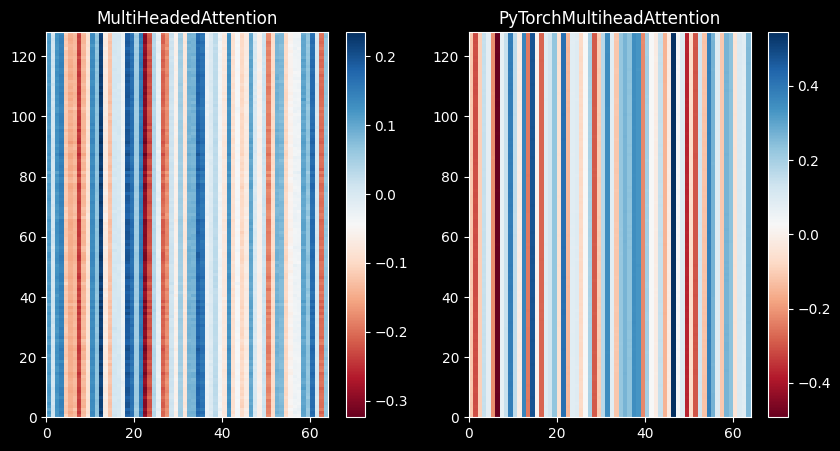

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pcolormesh(multihead_attn_output1[0].detach().numpy(), cmap="RdBu")
plt.title("MultiHeadedAttention")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.pcolormesh(multihead_attn_output2[0].detach().numpy(), cmap="RdBu")
plt.title("PyTorchMultiheadAttention")
plt.colorbar()
plt.show()

In [36]:
batch_size = 8
context_len = 1024
embed_dim = 768
embeddings = torch.randn((batch_size, context_len, embed_dim), device=dev)

In [37]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_in, d_out, context_length, dropout, num_heads, qkv_bias=False):
        super().__init__()
        assert d_out % num_heads == 0, "d_out must be divisible by num_heads"

        self.d_out = d_out
        self.num_heads = num_heads
        self.head_dim = (
            d_out // num_heads
        )  # Reduce the projection dim to match desired output dim

        self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
        self.out_proj = nn.Linear(d_out, d_out)  # Linear layer to combine head outputs
        self.dropout = nn.Dropout(dropout)
        self.register_buffer(
            "mask", torch.triu(torch.ones(context_length, context_length), diagonal=1)
        )

    def forward(self, x):
        b, num_tokens, d_in = x.shape

        keys = self.W_key(x)  # Shape: (b, num_tokens, d_out)
        queries = self.W_query(x)
        values = self.W_value(x)

        # We implicitly split the matrix by adding a `num_heads` dimension
        # Unroll last dim: (b, num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)
        keys = keys.view(b, num_tokens, self.num_heads, self.head_dim)
        values = values.view(b, num_tokens, self.num_heads, self.head_dim)
        queries = queries.view(b, num_tokens, self.num_heads, self.head_dim)

        # Transpose: (b, num_tokens, num_heads, head_dim) -> (b, num_heads, num_tokens, head_dim)
        keys = keys.transpose(1, 2)
        queries = queries.transpose(1, 2)
        values = values.transpose(1, 2)

        # Compute scaled dot-product attention (aka self-attention) with a causal mask
        attn_scores = queries @ keys.transpose(2, 3)  # Dot product for each head

        # Original mask truncated to the number of tokens and converted to boolean
        mask_bool = self.mask.bool()[:num_tokens, :num_tokens]

        # Use the mask to fill attention scores
        attn_scores.masked_fill_(mask_bool, -torch.inf)

        attn_weights = torch.softmax(attn_scores / keys.shape[-1] ** 0.5, dim=-1)
        attn_weights = self.dropout(attn_weights)

        # Shape: (b, num_tokens, num_heads, head_dim)
        context_vec = (attn_weights @ values).transpose(1, 2)

        # Combine heads, where self.d_out = self.num_heads * self.head_dim
        context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
        context_vec = self.out_proj(context_vec)  # optional projection

        return context_vec

In [38]:
mha_ch03 = MultiHeadAttention(
    d_in=embed_dim,
    d_out=embed_dim,
    context_length=context_len,
    dropout=0.0,
    num_heads=12,
    qkv_bias=False,
).to(dev)

out = mha_ch03(embeddings)

print(out.shape)
print(out)

torch.Size([8, 1024, 768])
tensor([[[ 3.8628e-01,  6.2228e-02, -2.3284e-03,  ..., -3.7898e-01,
           5.8982e-01,  2.0818e-01],
         [-4.6406e-02, -1.6693e-01,  7.1910e-02,  ..., -1.7412e-02,
           2.1928e-01,  5.1186e-01],
         [-1.5332e-01, -3.7307e-01, -1.2692e-01,  ...,  1.0149e-01,
           2.4451e-01,  4.7796e-01],
         ...,
         [-4.0625e-02, -4.0961e-02, -1.4145e-02,  ..., -9.7988e-04,
          -6.3471e-03, -1.1238e-02],
         [-3.5953e-02, -4.1328e-02, -2.2679e-02,  ...,  6.4891e-04,
          -1.7142e-03, -3.1908e-02],
         [-3.4029e-02, -3.6378e-02, -1.5231e-02,  ...,  2.8572e-03,
          -7.4174e-03, -2.6010e-02]],

        [[-9.2848e-02, -2.3401e-02, -3.2479e-02,  ...,  8.4607e-02,
           5.9044e-03,  1.7830e-01],
         [ 5.1574e-01, -9.9828e-02,  2.2247e-01,  ..., -9.8023e-02,
           5.5270e-03,  1.3655e-02],
         [ 1.6758e-01, -3.4744e-02,  2.5049e-02,  ..., -1.3403e-01,
           4.3386e-02, -2.8127e-02],
         ...

In [39]:
multihead_attn1 = MultiHeadedAttention(embed_dim, num_heads)

multihead_attn_output1 = multihead_attn1(embeddings, embeddings, embeddings)


multihead_attn2 = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
multihead_attn_output2, multihead_attn_output_weights2 = multihead_attn2(
    embeddings, embeddings, embeddings
)

print(multihead_attn_output1.size())
print(multihead_attn_output2.size())

torch.Size([8, 1024, 768])
torch.Size([8, 1024, 768])


In [40]:
print(multihead_attn_output1)

tensor([[[-6.1046e-01, -2.5782e-01,  7.4259e-02,  ..., -2.7894e-01,
           1.4120e-01,  2.9914e-01],
         [-2.3958e-01,  1.3387e-01, -4.4178e-01,  ..., -1.8518e-01,
           8.3588e-01, -2.7537e-02],
         [ 6.7436e-01,  1.9840e-01,  1.5606e-01,  ..., -2.8688e-02,
           2.8993e-01, -1.0336e-01],
         ...,
         [-6.9619e-05, -1.5059e-04,  4.2482e-04,  ...,  1.3403e-04,
          -1.7851e-04,  7.3079e-04],
         [-5.1576e-02, -1.2920e-01,  2.9779e-01,  ..., -8.7052e-02,
          -8.0126e-02,  3.5130e-01],
         [-5.2711e-01,  9.9642e-02, -2.6670e-01,  ...,  1.5633e-01,
           7.3912e-03,  4.0494e-01]],

        [[ 5.6134e-02,  3.9173e-01,  2.4330e-01,  ..., -1.4030e-01,
           7.2415e-02, -5.7058e-01],
         [-9.1208e-02, -3.4430e-01, -2.2956e-01,  ..., -1.5580e-03,
           1.3166e-02, -5.2748e-01],
         [-2.1514e-01,  3.1983e-02, -7.2308e-02,  ...,  3.3911e-01,
          -5.9449e-01,  2.7923e-02],
         ...,
         [ 1.8287e-03,  2

In [41]:
print(multihead_attn_output2)

tensor([[[ 0.0036, -0.0056, -0.0033,  ..., -0.0236,  0.0075,  0.0143],
         [ 0.0019, -0.0063,  0.0191,  ..., -0.0152,  0.0051, -0.0031],
         [-0.0059, -0.0255,  0.0195,  ..., -0.0048,  0.0146,  0.0019],
         ...,
         [ 0.0011, -0.0219,  0.0241,  ..., -0.0146, -0.0003,  0.0201],
         [-0.0229, -0.0408, -0.0157,  ..., -0.0188,  0.0093,  0.0056],
         [-0.0105, -0.0068,  0.0120,  ..., -0.0266,  0.0298, -0.0048]],

        [[ 0.0065, -0.0272,  0.0128,  ..., -0.0205,  0.0072,  0.0197],
         [ 0.0141, -0.0167,  0.0089,  ..., -0.0331, -0.0011,  0.0137],
         [ 0.0124, -0.0079,  0.0039,  ..., -0.0374, -0.0137,  0.0148],
         ...,
         [ 0.0330, -0.0185,  0.0071,  ...,  0.0149, -0.0078,  0.0063],
         [ 0.0266, -0.0179, -0.0057,  ..., -0.0265, -0.0208,  0.0171],
         [ 0.0356, -0.0117, -0.0122,  ..., -0.0248,  0.0054,  0.0282]],

        [[ 0.0106,  0.0026, -0.0201,  ..., -0.0192, -0.0073, -0.0086],
         [-0.0084, -0.0173, -0.0245,  ..., -0